# PROJECT FOR ALY6020-Predictive Analytics
Analysis of Women's E-Commerce Clothing Reviews
- Link to the dataset: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

 

GROUP MEMBERS:
- Ashlesha Kshirsagar
- Shruti Avinash Pawar


Week 2- EDA
Week 3- NLP, GLM
Week 4- KNN, RF, GB

 

In [1]:
# Importing libraries as required 
import pandas as pd
import numpy as np
import scipy
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore') 

from IPython.display import Image

%matplotlib inline



In [2]:
# Importing Dataframe
url = "https://raw.githubusercontent.com/ashlesha10/Women-s-E-Commerce-Clothing-Reviews/master/Data/Womens%20Clothing%20E-Commerce%20Reviews.csv" # Make sure the url is the raw version of the file on GitHub
df=pd.read_csv(url,index_col=0)
print(df.shape)
df.head()

(23486, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Cleaning, EDA and Visualization

In [3]:
#Checking for null values in the entire data
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [4]:
#Removing the nul values and storing the dataframe into new dataframe named new_data.
df1=df.dropna(axis=0, how='any')
print(df1.ndim)
print(df1.shape)
df1.head()

2
(19662, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


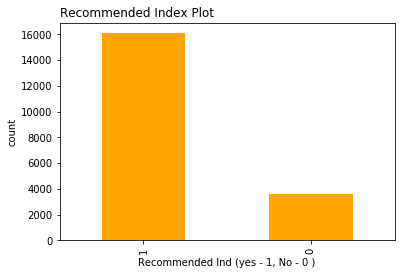

In [9]:
#Bar plot to check the count of recommended v/s not recommended
df2 = df1
df2['Recommended IND'].value_counts()[:].plot(kind='bar', color='orange')
df2['Recommended IND'].value_counts()
plt.title("Recommended Index Plot",loc ='left')
plt.xlabel('Recommended Ind (yes - 1, No - 0 )')
plt.ylabel('count')
plt.show()


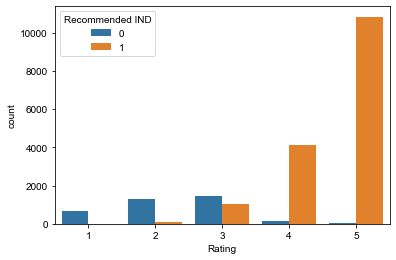

In [10]:
sns.countplot(x='Rating', hue='Recommended IND',data=df1)
sns.set(rc={'figure.figsize':(10,20)})

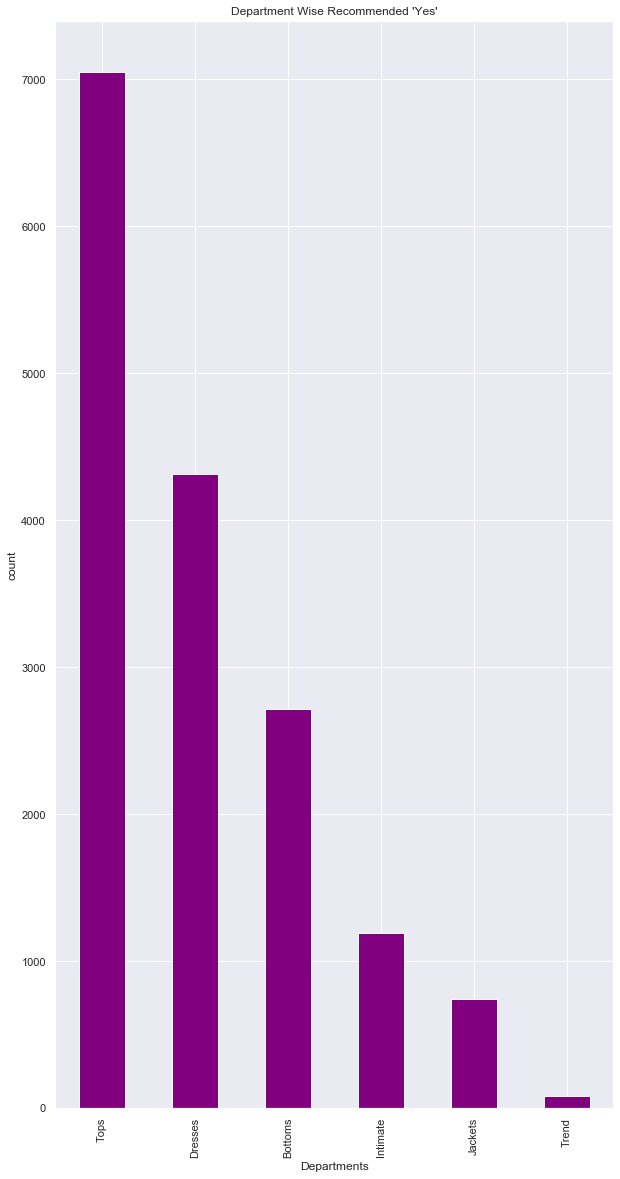

In [11]:
#subsetting the dataframe to plot which department is contributing to most recommendations
df2 = df2.rename(columns={"Recommended IND": "Recommended"})
df3 = df2[df2.Recommended == 1]
df3
df3['Department Name'].value_counts()[:].plot(kind='bar', color='purple')
df3['Department Name'].value_counts()
plt.title("Department Wise Recommended 'Yes'")
plt.xlabel('Departments')
plt.ylabel('count')
plt.show()

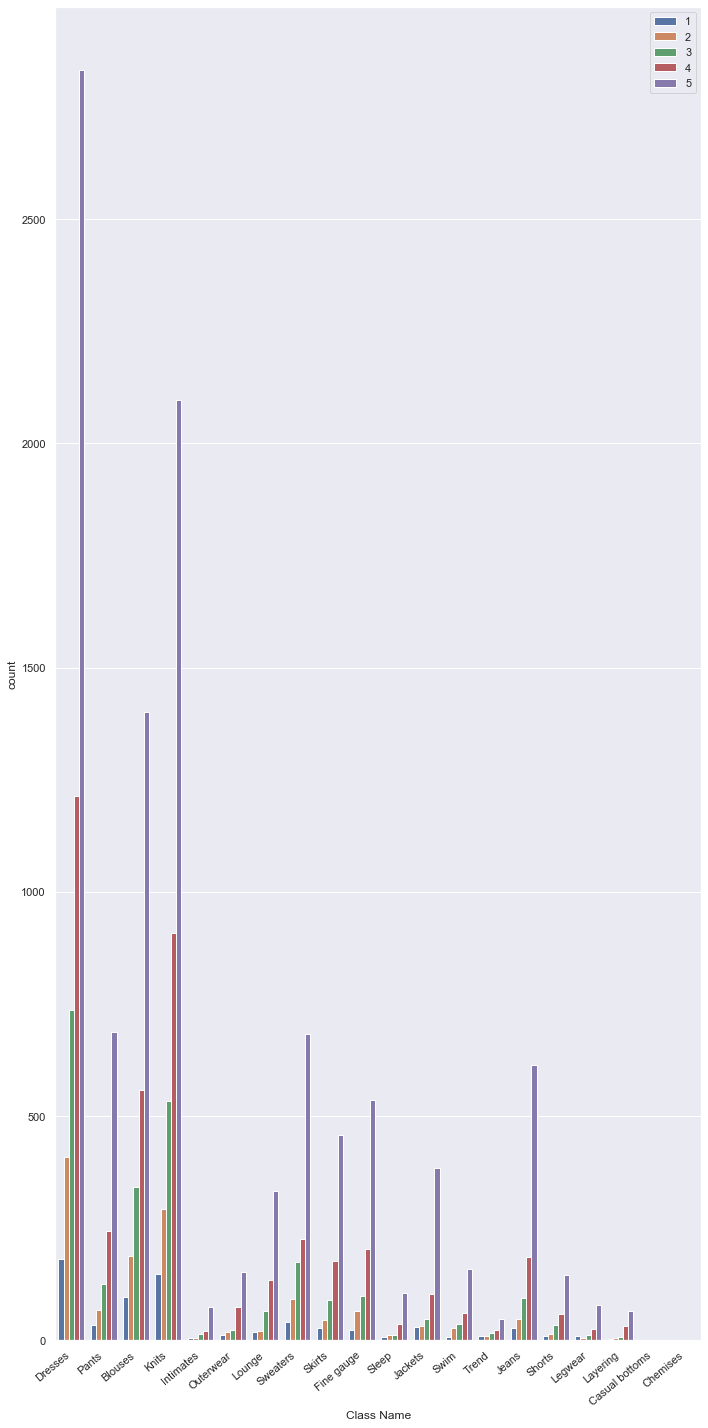

In [12]:
ax=sns.countplot(x="Class Name",hue='Rating',data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.legend(loc='upper right')
sns.set(rc={'figure.figsize':(10,10)})

In [13]:
bins = [0,20,30, 40, 50, 60, 70, 80,90,100]
labels = ['0-20','21-30', '31-40', '41-50', '51-60', '61-70', '71-80','81-90','91-100']
df2['agerange'] = pd.cut(df2.Age, bins, labels = labels,include_lowest = True)
df2.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,agerange
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,51-60
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,41-50
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,41-50
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,41-50
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,31-40


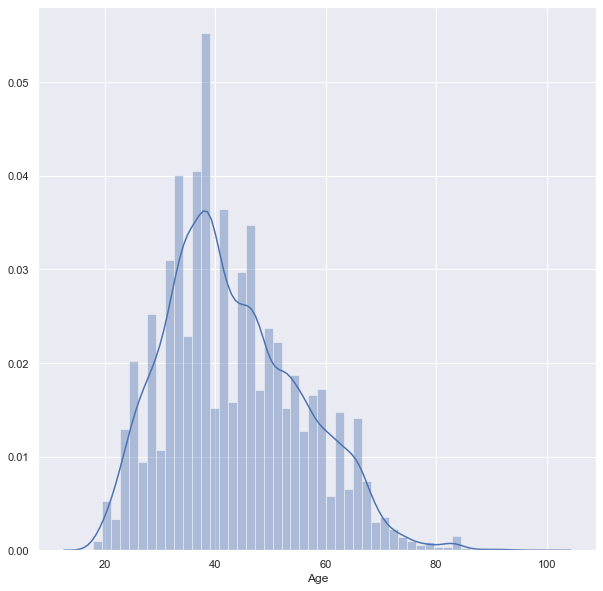

In [14]:
sns.distplot(df1['Age'])
sns.set(rc={'figure.figsize':(10,10)})

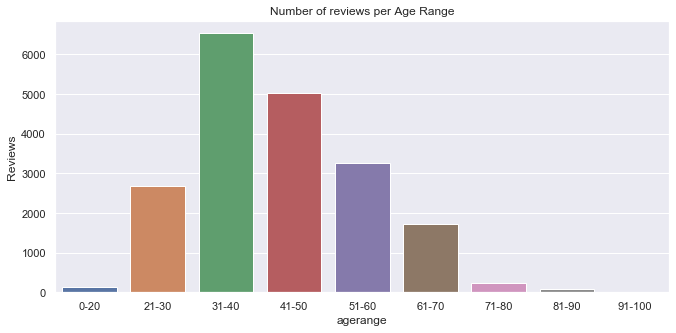

In [15]:
sns.set(rc={'figure.figsize':(11,5)})
sns.countplot(df2['agerange'])
plt.xlabel('agerange')
plt.ylabel('Reviews')
plt.title('Number of reviews per Age Range');

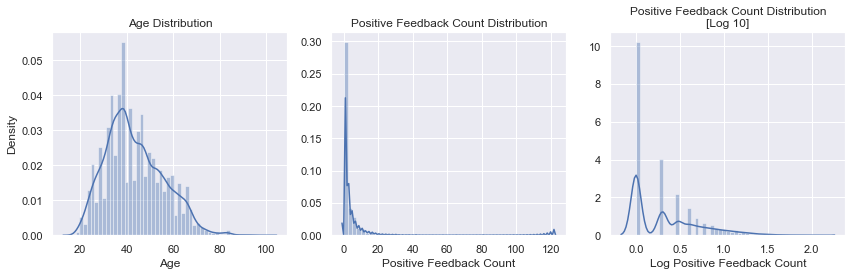

In [16]:
# Continous Distributions
f, ax = plt.subplots(1,3,figsize=(12,4), sharey=False)
sns.distplot(df1.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")
sns.distplot(df1["Positive Feedback Count"], ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution")
sns.distplot(np.log10((df1["Positive Feedback Count"][df1["Positive Feedback Count"].notnull()]+1)), ax=ax[2])
ax[2].set_title("Positive Feedback Count Distribution\n[Log 10]")
ax[2].set_xlabel("Log Positive Feedback Count")
plt.tight_layout()
plt.show()


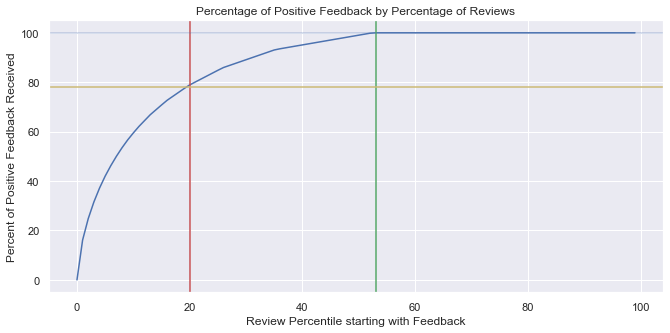

78.0% of Positive Feedback belongs to the top 20% of Reviews

Gini Coefficient: 0.76


In [17]:
# Percentage Accumulation from "Most Wealthy"
def percentage_accumulation(series, percentage):
    return (series.sort_values(ascending=False)
            [:round(series.shape[0]*(percentage/100))]
     .sum()/series
     .sum()*100)

# Gini Coefficient- Inequality Score
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

# Cumulative Percentage of Positive Feedback assigned Percent of Reviewers (from most wealthy)
inequality = []
for x in list(range(100)):
    inequality.append(percentage_accumulation(df["Positive Feedback Count"], x))

# Generic Matplotlib Plot
plt.plot(inequality)
plt.title("Percentage of Positive Feedback by Percentage of Reviews")
plt.xlabel("Review Percentile starting with Feedback")
plt.ylabel("Percent of Positive Feedback Received")
plt.axvline(x=20, c = "r")
plt.axvline(x=53, c = "g")
plt.axhline(y=78, c = "y")
plt.axhline(y=100, c = "b", alpha=.3)
plt.show()

# 80-20 Rule Confirmation
print("{}% of Positive Feedback belongs to the top 20% of Reviews".format(
    round(percentage_accumulation(df1["Positive Feedback Count"], 20))))

# Gini
print("\nGini Coefficient: {}".format(round(gini(df1["Positive Feedback Count"]),2)))

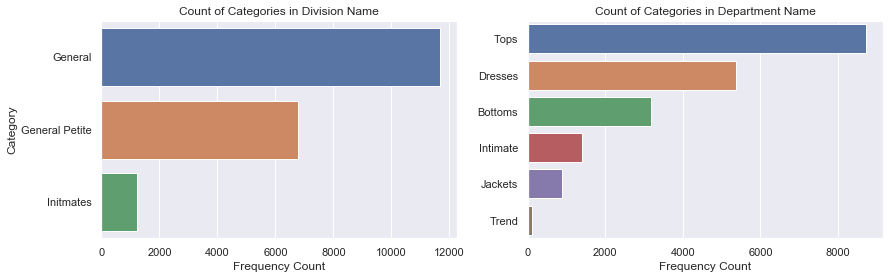

In [18]:

row_plots = ["Division Name","Department Name"]
f, axes = plt.subplots(1,len(row_plots), figsize=(14,4), sharex=False)

for i,x in enumerate(row_plots):
    sns.countplot(y=x, data=df1,order=df1[x].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
axes[0].set_ylabel("Category")
axes[1].set_ylabel("")
plt.show()

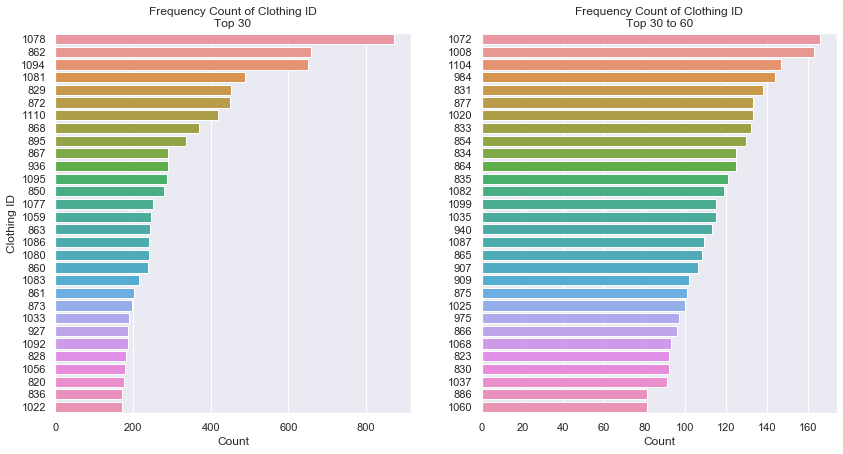

Dataframe Dimension: 19662 Rows


,mean,std,min,25%,50%,75%,max
Clothing ID,1017.581651,102.534388,862.0,862.0,1078.0,1094.00,1094.0
Age,42.622477,12.047944,18.0,34.0,41.0,50.25,99.0
Rating,4.181193,1.100592,1.0,4.0,5.0,5.00,5.0
Recommended IND,0.813761,0.389388,0.0,1.0,1.0,1.00,1.0
Positive Feedback Count,2.961927,6.967565,0.0,0.0,1.0,3.00,98.0


In [19]:
# Clothing ID Category
f, axes = plt.subplots(1,2, figsize=[14,7])
num = 30
sns.countplot(y="Clothing ID", data = df1[df1["Clothing ID"].isin(df1["Clothing ID"].value_counts()[:num].index)],
              order= df1["Clothing ID"].value_counts()[:num].index, ax=axes[0])
axes[0].set_title("Frequency Count of Clothing ID\nTop 30")
axes[0].set_xlabel("Count")

sns.countplot(y="Clothing ID", data = df1[df["Clothing ID"].isin(df1["Clothing ID"].value_counts()[num:60].index)],
              order= df1["Clothing ID"].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title("Frequency Count of Clothing ID\nTop 30 to 60")
axes[1].set_ylabel("")
axes[1].set_xlabel("Count")
plt.show()

print("Dataframe Dimension: {} Rows".format(df1.shape[0]))
df1[df1["Clothing ID"].isin([1078, 862,1094])].describe().T.drop("count",axis=1)

In [20]:
df.loc[df["Clothing ID"].isin([1078, 862,1094]),
       ["Title", "Division Name","Department Name","Class Name"]].describe(include=["O"]).T.drop("count",axis=1)

,unique,top,freq
Title,1815,Beautiful dress,21
Division Name,2,General,1572
Department Name,2,Dresses,1780
Class Name,2,Dresses,1780


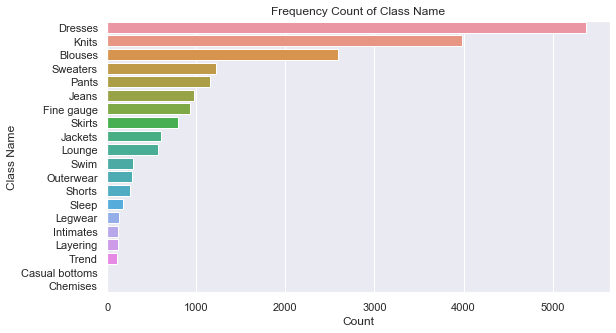

In [21]:
# Class Name
plt.subplots(figsize=(9,5))
sns.countplot(y="Class Name", data=df1,order=df1["Class Name"].value_counts().index)
plt.title("Frequency Count of Class Name")
plt.xlabel("Count")
plt.show()

### NLP

In [5]:
df1.groupby(['Rating','Recommended IND'])['Recommended IND'].count()

Rating  Recommended IND
1       0                    684
        1                      7
2       0                   1280
        1                     80
3       0                   1444
        1                   1020
4       0                    146
        1                   4143
5       0                     21
        1                  10837
Name: Recommended IND, dtype: int64

In [6]:
new_df = df1[['Title', 'Review Text', 'Recommended IND']]
new_df.head()

,Title,Review Text,Recommended IND
2,Some major design flaws,I had such high hopes for this dress and reall...,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1
4,Flattering shirt,This shirt is very flattering to all due to th...,1
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",0
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1


In [7]:
#Combining Title and Review text and making a review variable
new_df['Review'] = new_df['Title'] + ' ' + new_df['Review Text']
new_df = new_df.drop(labels=['Title','Review Text'] , axis=1)
new_df.head()

,Recommended IND,Review
2,0,Some major design flaws I had such high hopes ...
3,1,"My favorite buy! I love, love, love this jumps..."
4,1,Flattering shirt This shirt is very flattering...
5,0,Not for the very petite I love tracy reese dre...
6,1,Cagrcoal shimmer fun I aded this in my basket ...


In [8]:
#Renaming Recomended IND column
new_df = new_df.rename(columns={"Recommended IND": "Recommended"})
print("My data's shape is:", new_df.shape)
new_df.head()

My data's shape is: (19662, 2)


,Recommended,Review
2,0,Some major design flaws I had such high hopes ...
3,1,"My favorite buy! I love, love, love this jumps..."
4,1,Flattering shirt This shirt is very flattering...
5,0,Not for the very petite I love tracy reese dre...
6,1,Cagrcoal shimmer fun I aded this in my basket ...


In [9]:
#adding a column Review Length to the dataframe
new_df['Review_length'] = new_df['Review'].apply(len)
print(new_df.shape)
new_df.head()

(19662, 3)


,Recommended,Review,Review_length
2,0,Some major design flaws I had such high hopes ...,524
3,1,"My favorite buy! I love, love, love this jumps...",141
4,1,Flattering shirt This shirt is very flattering...,209
5,0,Not for the very petite I love tracy reese dre...,512
6,1,Cagrcoal shimmer fun I aded this in my basket ...,517


In [10]:
new_df['Review_length'].describe()

count    19662.000000
mean       338.389838
std        144.610783
min         23.000000
25%        217.000000
50%        335.500000
75%        496.000000
max        557.000000
Name: Review_length, dtype: float64

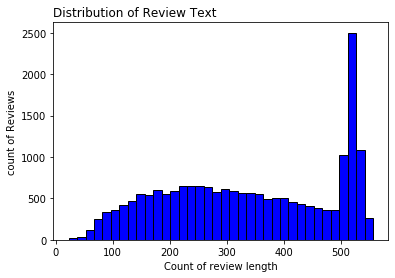

In [11]:
plt.hist(new_df['Review_length'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.title("Distribution of Review Text",loc ='left')
plt.xlabel('Count of review length')
plt.ylabel('count of Reviews')
plt.show()

In [12]:
def count_exclamation(strng):
    count = 0
    for char in strng:
        if char == '!':
            count += 1
    return count

In [13]:
new_df['Exc_Count'] = new_df['Review'].apply(count_exclamation)
new_df.head(5)

,Recommended,Review,Review_length,Exc_Count
2,0,Some major design flaws I had such high hopes ...,524,1
3,1,"My favorite buy! I love, love, love this jumps...",141,3
4,1,Flattering shirt This shirt is very flattering...,209,3
5,0,Not for the very petite I love tracy reese dre...,512,0
6,1,Cagrcoal shimmer fun I aded this in my basket ...,517,0


In [14]:
new_df['Exc_Count'].describe()

count    19662.000000
mean         0.882921
std          1.412027
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         41.000000
Name: Exc_Count, dtype: float64

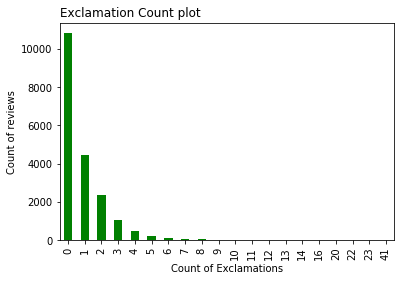

In [15]:
new_df['Exc_Count'].value_counts().sort_index().plot(kind='bar',color = "g")
plt.title("Exclamation Count plot",loc ='left')
plt.xlabel('Count of Exclamations')
plt.ylabel('Count of reviews')
plt.show()

In [16]:
new_df[new_df['Exc_Count']== 41].index

Int64Index([3301], dtype='int64')

In [17]:
new_df['Review'][3301]

'Beautiful and unique. Love this top, just received it today.\nit is a very artistic interpretation for a casual top.\nthe blue is gorgeous!\nthe unique style of the peplm and the details on the front set this apart!\nruns a little shorter, but i feel the length enhances it;s beauty, and is appropriate for the overall design.\nlove !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\nordered my usual size and it fits perfectly.'

In [18]:
new_df['Polarity'] = new_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
new_df.head(20)

,Recommended,Review,Review_length,Exc_Count,Polarity
2,0,Some major design flaws I had such high hopes ...,524,1,0.073209
3,1,"My favorite buy! I love, love, love this jumps...",141,3,0.560714
4,1,Flattering shirt This shirt is very flattering...,209,3,0.512891
5,0,Not for the very petite I love tracy reese dre...,512,0,0.181111
6,1,Cagrcoal shimmer fun I aded this in my basket ...,517,0,0.157500
7,1,"Shimmer, surprisingly goes with lots I ordered...",519,0,0.230342
8,1,Flattering I love this dress. i usually get an...,177,0,0.002500
9,1,"Such a fun dress! I'm 5""5' and 125 lbs. i orde...",378,1,0.201814
10,0,Dress looks like it's made of cheap material D...,381,2,-0.047435
12,1,Perfect!!! More and more i find myself reliant...,513,3,0.307143


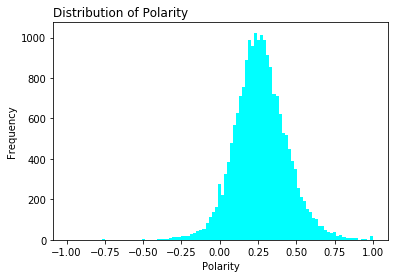

In [19]:
new_df['Polarity'].plot(kind='hist', bins=100,color = 'cyan')
plt.title("Distribution of Polarity",loc ='left')
plt.xlabel('Polarity')
plt.show()

In [24]:
prep = new_df.copy()

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [27]:
prep['Review'] = prep['Review'].apply(punctuation_removal)
prep['Review'].head()

2    Some major design flaws I had such high hopes ...
3    My favorite buy I love love love this jumpsuit...
4    Flattering shirt This shirt is very flattering...
5    Not for the very petite I love tracy reese dre...
6    Cagrcoal shimmer fun I aded this in my basket ...
Name: Review, dtype: object

In [28]:
def adj_collector(review_str):
    new_str=[]
    review_str = word_tokenize(review_str)
    tup_word = nltk.pos_tag(review_str)
    for tup in tup_word:
        if 'VB' in tup[1] or tup[1]=='JJ':  #Verbs and Adjectives
            new_str.append(tup[0])  
    return ' '.join(new_str)

In [29]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\spawa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\spawa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spawa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
prep['Review'] = prep['Review'].apply(adj_collector)
prep['Review'].head(7)

2    major had such high wanted work i ordered smal...
3         favorite love love fabulous wear i get great
4    Flattering is flattering due adjustable is per...
5    petite love reese is petite am tall wear was i...
6    aded last see look i went am pale is gorgeous ...
7    goes ordered had try used top pair went is nic...
8    Flattering love get runs little ordered flatte...
Name: Review, dtype: object

Removing stopwords

In [31]:
print(stopwords.words('english')[::12])

['i', "you'd", 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', "don't", 'aren', 'haven', "shan't"]


In [32]:
stop = stopwords.words('english')
stop.append("i'm")

In [33]:
stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 
print(stop_words[::12])

['i', 'youd', 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', 'dont', 'aren', 'haven', 'shant']


In [34]:
clothes_list =['dress', 'top','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear']

In [35]:
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words and word.lower() not in clothes_list ]

In [36]:
prep['Review'] = prep['Review'].apply(stopwords_removal)
prep['Review'].head()

2    [major, high, wanted, work, ordered, small, us...
3         [favorite, love, love, fabulous, get, great]
4    [flattering, flattering, due, adjustable, perf...
5    [petite, love, reese, petite, tall, long, full...
6    [aded, last, see, look, went, pale, gorgeous, ...
Name: Review, dtype: object

In [37]:
print(prep['Review'][267])

['nice', 'short', 'tall', 'iamp39d', 'say', 'fits', 'true', 'short', 'iamp39m', 'tall', 'wish', 'came']


Removing all numbers (weight, size etc.

In [38]:
def drop_numbers(nos):
    rem_nos = []
    for i in nos:
        if not re.search('\d', i):
            rem_nos.append(i)
    return ' '.join(rem_nos)

In [39]:
prep['Review'] = prep['Review'].apply(drop_numbers)
prep['Review'].head()

2    major high wanted work ordered small usual fou...
3                favorite love love fabulous get great
4    flattering flattering due adjustable perfect p...
5    petite love reese petite tall long full overwh...
6    aded last see look went pale gorgeous turns ma...
Name: Review, dtype: object

In [40]:
print(prep['Review'][267])

nice short tall say fits true short tall wish came


Stemming

In [41]:
porter = PorterStemmer()

In [42]:
prep['Review'] = prep['Review'].apply(lambda x: x.split())
prep['Review'].head()

2    [major, high, wanted, work, ordered, small, us...
3         [favorite, love, love, fabulous, get, great]
4    [flattering, flattering, due, adjustable, perf...
5    [petite, love, reese, petite, tall, long, full...
6    [aded, last, see, look, went, pale, gorgeous, ...
Name: Review, dtype: object

In [43]:
def stem_update(text_list):
    text_list_new = []
    for word in text_list:
        word = porter.stem(word)
        text_list_new.append(word) 
    return text_list_new

In [44]:
prep['Review'] = prep['Review'].apply(stem_update)
prep['Review'].head()

2    [major, high, want, work, order, small, usual,...
3             [favorit, love, love, fabul, get, great]
4    [flatter, flatter, due, adjust, perfect, pair,...
5    [petit, love, rees, petit, tall, long, full, o...
6    [ade, last, see, look, went, pale, gorgeou, tu...
Name: Review, dtype: object

In [45]:
prep['Review'] = prep['Review'].apply(lambda x: ' '.join(x))
prep['Review'].head()

2    major high want work order small usual found s...
3                    favorit love love fabul get great
4     flatter flatter due adjust perfect pair cardigan
5    petit love rees petit tall long full overwhelm...
6    ade last see look went pale gorgeou turn mathc...
Name: Review, dtype: object

In [46]:
print(prep['Review'][2293])

flatter purchas return expect fit said lb got get disappoint soft purchas regular fit look terribl say tall thin ye short petit


Wordcloud

In [47]:
pos_df = prep[prep.Recommended== 1]
neg_df = prep[prep.Recommended== 0]
pos_df.head(10)

,Recommended,Review,Review_length,Exc_Count,Polarity
3,1,favorit love love fabul get great,141,3,0.560714
4,1,flatter flatter due adjust perfect pair cardigan,209,3,0.512891
6,1,ade last see look went pale gorgeou turn mathc...,517,0,0.157500
7,1,goe order tri use pair went nice went flare et...,519,0,0.230342
8,1,flatter love get run littl order flatter femin...,177,0,0.002500
9,1,order make sure long xs busti fit snug tight l...,378,1,0.201814
12,1,find written savvi right reveiwsi tri made lin...,513,3,0.307143
13,1,big bought go line xs fit flowi say run big ni...,383,0,0.168125
14,1,nice graze conserv relat small small run small...,536,0,-0.036667
15,1,took want fit tell put straight small size tel...,496,1,0.205988


In [48]:
pos_words =[]
neg_words = []

for review in pos_df.Review:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)


for review in neg_df.Review:
    neg_words.append(review)
neg_words = ' '.join(neg_words)



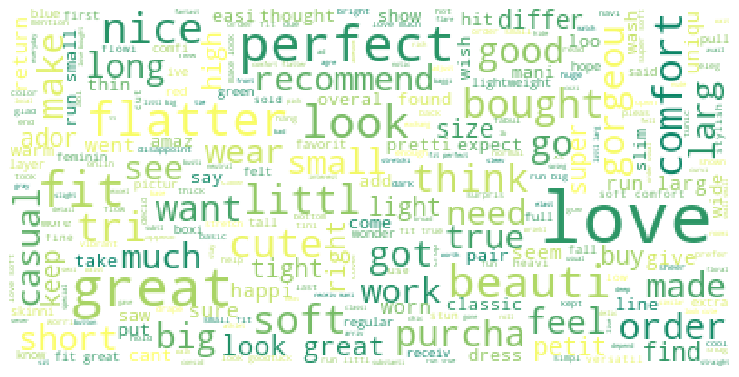

In [49]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

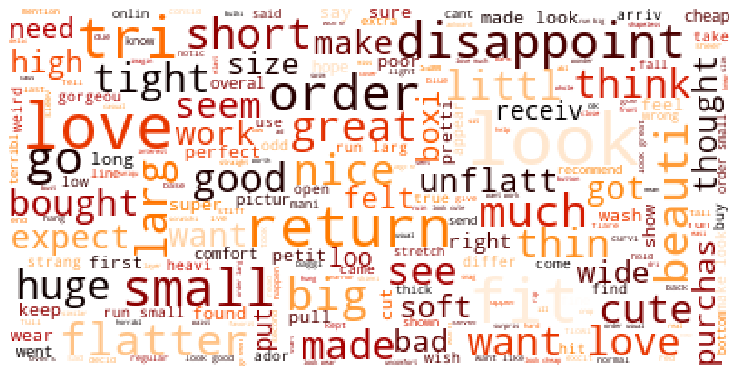

In [50]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Vectorizing - Bag of Words

In [51]:
def vectorizing_process(sentence_str):
    return [word for word in sentence_str.split()]

In [52]:
bow_transformer = CountVectorizer(vectorizing_process)

In [53]:
bow_transformer.fit(prep['Review'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8',
                input=<function vectorizing_process at 0x000002C5F1747288>,
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [54]:
print(prep['Review'].iloc[6])

flatter love get run littl order flatter feminin usual


In [55]:
example = bow_transformer.transform([prep['Review'].iloc[6]])
print(example)

  (0, 2148)	1
  (0, 2242)	2
  (0, 2492)	1
  (0, 3420)	1
  (0, 3506)	1
  (0, 4209)	1
  (0, 5097)	1
  (0, 6812)	1


In [56]:
Reviews = bow_transformer.transform(prep['Review'])
Reviews

<19662x7276 sparse matrix of type '<class 'numpy.int64'>'
	with 237857 stored elements in Compressed Sparse Row format>

In [57]:
print('Shape of Sparse Matrix', Reviews.shape)
print('Amount of Non-Zero occurences:', Reviews.nnz)

Shape of Sparse Matrix (19662, 7276)
Amount of Non-Zero occurences: 237857


Term Frequency–Inverse Document Frequency

In [58]:
tfidf_transformer = TfidfTransformer().fit(Reviews)

tfidf_example = tfidf_transformer.transform(example)
print (tfidf_example)

  (0, 6812)	0.38715702321289835
  (0, 5097)	0.28876414175053866
  (0, 4209)	0.2562478579058955
  (0, 3506)	0.18640763255159604
  (0, 3420)	0.26875472512076126
  (0, 2492)	0.30503570134358937
  (0, 2242)	0.5339366121269553
  (0, 2148)	0.46470394072207855


In [59]:
[i for i in bow_transformer.vocabulary_.items() if i[1]==2226]

[('flamenco', 2226)]

In [60]:
[i for i in bow_transformer.vocabulary_.items()][6:60:10]

[('usual', 6812),
 ('tight', 6382),
 ('flatter', 2242),
 ('overwhelm', 4301),
 ('pale', 4322),
 ('said', 5132)]

In [61]:
msg_tfidf = tfidf_transformer.transform(Reviews)
msg_tfidf.shape

(19662, 7276)

In [62]:
print(msg_tfidf[:1])

  (0, 7272)	0.21471248032123674
  (0, 7158)	0.12710403438351436
  (0, 6929)	0.12017356219848803
  (0, 6812)	0.15132348131106407
  (0, 6382)	0.14062308848813138
  (0, 5600)	0.2978653215468642
  (0, 5289)	0.18844097401824506
  (0, 4942)	0.24443010814357377
  (0, 4437)	0.13984936774578804
  (0, 4259)	0.1585652642096957
  (0, 4209)	0.1001565659716828
  (0, 4137)	0.20923107084158285
  (0, 3943)	0.30396331781030056
  (0, 3583)	0.5250335216558651
  (0, 2933)	0.3111490185969125
  (0, 2768)	0.1460467597438324
  (0, 2363)	0.15055240254904467
  (0, 2196)	0.08515020472060218
  (0, 1153)	0.1062615432086087
  (0, 984)	0.19197041555126027
  (0, 698)	0.18406569756771646


Merging Sparse matrix with other features

In [63]:
msg_tfidf = msg_tfidf.toarray()
msg_tfidf = pd.DataFrame(msg_tfidf)
print(msg_tfidf.shape)
msg_tfidf.head()

(19662, 7276)


,0,1,2,3,4,5,6,7,8,9,...,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.214712,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [64]:
Thedata = pd.merge(prep.drop(columns='Review'),msg_tfidf, 
                  left_index=True, right_index=True )
Thedata.head()

,Recommended,Review_length,Exc_Count,Polarity,0,1,2,3,4,5,...,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275
2,0,524,1,0.073209,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,141,3,0.560714,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,209,3,0.512891,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,512,0,0.181111,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,517,0,0.157500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


splitting the data

In [65]:
X = Thedata.drop('Recommended', axis=1)
Y = Thedata.Recommended

X.head()


,Review_length,Exc_Count,Polarity,0,1,2,3,4,5,6,...,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275
2,524,1,0.073209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,141,3,0.560714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,209,3,0.512891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,512,0,0.181111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,517,0,0.157500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
X.shape

(16462, 7279)

In [67]:
X.describe()

,Review_length,Exc_Count,Polarity,0,1,2,3,4,5,6,...,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275
count,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,...,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000,16462.000000
mean,338.276030,0.876503,0.266007,0.000024,0.000030,0.000024,0.000021,0.000086,0.000021,0.000020,...,0.000050,0.000025,0.000076,0.000072,0.000082,0.000021,0.002140,0.000288,0.000030,0.000121
std,144.664277,1.414427,0.172859,0.003141,0.003797,0.003100,0.002750,0.006477,0.002696,0.002550,...,0.004584,0.003209,0.004955,0.005367,0.006109,0.002728,0.027677,0.010313,0.003801,0.007060
min,23.000000,0.000000,-0.987500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,217.000000,0.000000,0.158333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,335.000000,0.000000,0.260917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,496.000000,1.000000,0.370346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,557.000000,41.000000,1.000000,0.402950,0.487127,0.397742,0.352831,0.599438,0.345961,0.327221,...,0.450050,0.411746,0.382198,0.400073,0.496882,0.350035,0.629009,0.484782,0.487703,0.526879


In [68]:
X_train, X_test, Y_train, Y_test = split(X,Y, test_size=0.3, stratify=Y, random_state=111)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((11523, 7279), (4939, 7279), (11523,), (4939,))

In [69]:
Y_train.value_counts(normalize=True)

1    0.818624
0    0.181376
Name: Recommended, dtype: float64

In [70]:
Y_test.value_counts(normalize=True)

1    0.818587
0    0.181413
Name: Recommended, dtype: float64

# Logistic Regression Model

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [82]:
def report(y_true, y_pred, labels):
    cm = pd.DataFrame(confusion_matrix(y_true=y_true, y_pred=y_pred), 
                                        index=labels, columns=labels)
    rep = classification_report(y_true=y_true, y_pred=y_pred)
    return (f'Confusion Matrix:\n{cm}\n\nClassification Report:\n{rep}')

In [83]:
lr_model = LogisticRegression(class_weight='balanced', 
                              random_state=111, 
                              solver='lbfgs',
                              C=1.0)



In [84]:
gs_lr_model = GridSearchCV(lr_model, 
                           param_grid={'C': [0.01, 0.1, 0.5, 1.0, 5.0]}, 
                           cv=5, 
                           scoring='roc_auc')



In [85]:
gs_lr_model.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=111, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.5, 1.0, 5.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [86]:
gs_lr_model.best_params_

{'C': 0.1}

In [87]:
test_predictions = gs_lr_model.predict(X_test)
print(report(Y_test, test_predictions, gs_lr_model.classes_ ))

Confusion Matrix:
      0     1
0   663   233
1  1237  2806

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.74      0.47       896
           1       0.92      0.69      0.79      4043

    accuracy                           0.70      4939
   macro avg       0.64      0.72      0.63      4939
weighted avg       0.82      0.70      0.73      4939



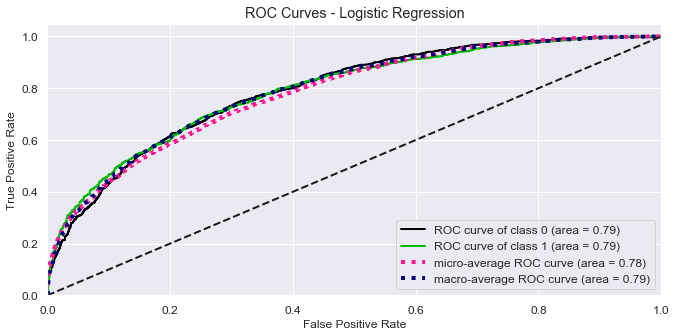

In [88]:
skplt.metrics.plot_roc(Y_test, gs_lr_model.predict_proba(X_test),
                      title='ROC Curves - Logistic Regression') 

# Adaptive Boosting

In [92]:
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=555)

ada_model = AdaBoostClassifier(base_estimator=dt, learning_rate=0.001, n_estimators=1000, random_state=222)
ada_model.fit(X_train ,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=555,
                        

In [102]:
test_predictions = ada_model.predict(X_test)
print(report(Y_test, test_predictions, ada_model.classes_ ))

Confusion Matrix:
     0     1
0  567   329
1  953  3090

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.63      0.47       896
           1       0.90      0.76      0.83      4043

    accuracy                           0.74      4939
   macro avg       0.64      0.70      0.65      4939
weighted avg       0.81      0.74      0.76      4939



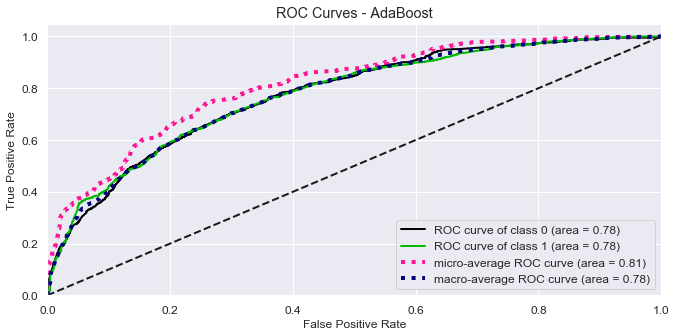

In [101]:
skplt.metrics.plot_roc(Y_test, ada_model.predict_proba(X_test), title='ROC Curves - AdaBoost') 

# KNN Classification - Week 4 

In [97]:
from sklearn.neighbors import KNeighborsClassifier
n=list(range(1,10))
for i in n:
    print('n=',i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, Y_train)

    print('Accuracy:',knn.score(X_train, Y_train))

    #Cross Validation 
    from sklearn.model_selection import cross_val_score
    knnscore = cross_val_score(knn,X_train, Y_train, cv=5)
    print('Cross Validation Scores',knnscore)
    print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

n= 1
Accuracy: 1.0
Cross Validation Scores [0.74273319 0.7362256  0.74316703 0.74522569 0.73307292]
0.74 (+/- 0.01)
n= 2
Accuracy: 0.8747721947409529
Cross Validation Scores [0.67071584 0.66724512 0.66420824 0.65407986 0.66536458]
0.66 (+/- 0.01)
n= 3
Accuracy: 0.8690445196563394
Cross Validation Scores [0.78438178 0.78264642 0.78481562 0.78255208 0.78385417]
0.78 (+/- 0.00)
n= 4
Accuracy: 0.852902889872429
Cross Validation Scores [0.74967462 0.75010846 0.7483731  0.75       0.75954861]
0.75 (+/- 0.01)
n= 5
Accuracy: 0.8460470363620585
Cross Validation Scores [0.79088937 0.80086768 0.79956616 0.79600694 0.79253472]
0.80 (+/- 0.01)
n= 6
Accuracy: 0.8392779658075155
Cross Validation Scores [0.77136659 0.77744035 0.78611714 0.77473958 0.78602431]
0.78 (+/- 0.01)
n= 7
Accuracy: 0.8342445543695218
Cross Validation Scores [0.80173536 0.8021692  0.80433839 0.80815972 0.80555556]
0.80 (+/- 0.00)
n= 8
Accuracy: 0.8328560270762823
Cross Validation Scores [0.78958785 0.79479393 0.80173536 0.79600

In [98]:
#import matplotlib.pyplot as plt
#k_range = range(1, 10)
#k_scores = []
#for k in k_range:
    #knn = KNeighborsClassifier(n_neighbors=k)
    #loss = abs(cross_val_score(knn, X_train, Y_train, cv=5, scoring='neg_mean_squared_error'))
    #k_scores.append(loss.mean())
#plt.plot(k_range, k_scores)
#plt.xlabel('Value of K for KNN')
#plt.ylabel('Cross-Validated MSE')
#plt.show()

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn = knn.fit(X_train, Y_train)
knn_predicted =knn.predict(X_test)
print(confusion_matrix(Y_test, knn_predicted ))
print(classification_report(Y_test,knn_predicted ))


[[ 389  507]
 [1138 2905]]
              precision    recall  f1-score   support

           0       0.25      0.43      0.32       896
           1       0.85      0.72      0.78      4043

    accuracy                           0.67      4939
   macro avg       0.55      0.58      0.55      4939
weighted avg       0.74      0.67      0.70      4939



# Random Forest

In [130]:
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=5, 
                                  class_weight='balanced', random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [131]:
test_predictions = rf_model.predict(X_test)
print(report(Y_test, test_predictions, rf_model.classes_ ))

Confusion Matrix:
     0     1
0  516   380
1  829  3214

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.58      0.46       896
           1       0.89      0.79      0.84      4043

    accuracy                           0.76      4939
   macro avg       0.64      0.69      0.65      4939
weighted avg       0.80      0.76      0.77      4939



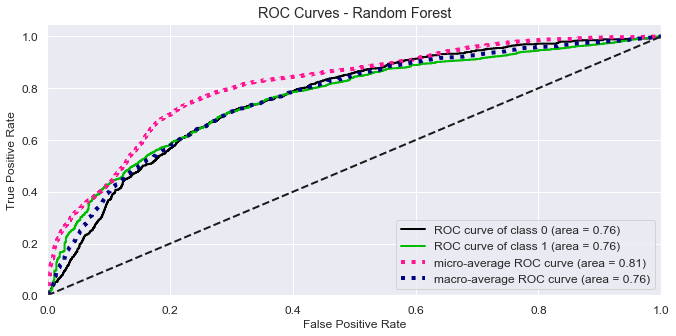

In [132]:
skplt.metrics.plot_roc(Y_test, rf_model.predict_proba(X_test), 
                       title='ROC Curves - Random Forest') 

In [133]:
rf_model1 = RandomForestClassifier(n_estimators=100, max_depth=5, 
                                  class_weight='balanced', random_state=42)
rf_model1.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [134]:
test_predictions1 = rf_model1.predict(X_test)
print(report(Y_test, test_predictions1, rf_model1.classes_ ))

Confusion Matrix:
     0     1
0  540   356
1  874  3169

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.60      0.47       896
           1       0.90      0.78      0.84      4043

    accuracy                           0.75      4939
   macro avg       0.64      0.69      0.65      4939
weighted avg       0.81      0.75      0.77      4939



In [132]:
rf_model2 = RandomForestClassifier(n_estimators=500, max_depth=5, 
                                  class_weight='balanced', random_state=42,criterion='gini', bootstrap=True)
rf_model2.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [133]:
test_predictions2 = rf_model2.predict(X_test)

print(confusion_matrix(Y_test, test_predictions2 ))
print(classification_report(Y_test, test_predictions2 ))

[[ 541  355]
 [ 837 3206]]
              precision    recall  f1-score   support

           0       0.39      0.60      0.48       896
           1       0.90      0.79      0.84      4043

    accuracy                           0.76      4939
   macro avg       0.65      0.70      0.66      4939
weighted avg       0.81      0.76      0.78      4939



In [128]:
probs = rf_model2.predict_proba(X_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_train, probs[:,1])

Text(0, 0.5, 'TPR')

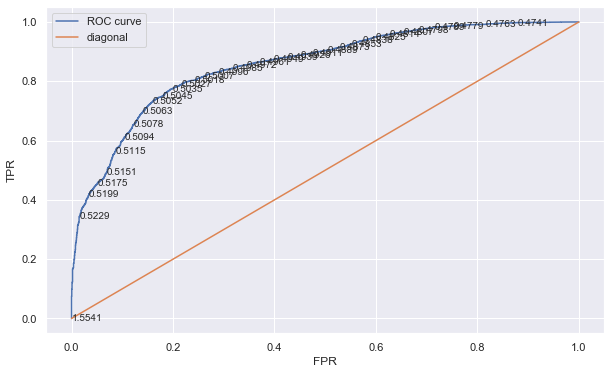

In [129]:
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, '-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::70], tpr[::70], thresholds[::70]):
    plt.annotate(np.round(txt,4), (x, y-0.01))

plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [106]:
my_list = list(zip(rf_model.feature_importances_ ,X.columns))
my_list.sort(key=lambda tup: tup[0],reverse=True)
my_list[:7]

[(0.07683801440597063, 'Polarity'),
 (0.044286603415511654, 'Exc_Count'),
 (0.01901396510958277, 'Review_length'),
 (0.009254994735250372, 5425),
 (0.009201279308306148, 6195),
 (0.008919502847334835, 2515),
 (0.007908679878988054, 3586)]

In [107]:
bow_list = [i for i in bow_transformer.vocabulary_.items()]

for i in my_list:
    for j in bow_list:
        if i[1] == j[1] and i[0]> 0.005:
            print(f'Importance: {i[0]:.4f}   Word num: {i[1]}   Word:  { j[0]}')

Importance: 0.0093   Word num: 5425   Word:  shrink
Importance: 0.0092   Word num: 6195   Word:  take
Importance: 0.0089   Word num: 2515   Word:  glad
Importance: 0.0079   Word num: 3586   Word:  make
Importance: 0.0079   Word num: 5517   Word:  skin
Importance: 0.0066   Word num: 2768   Word:  high
Importance: 0.0062   Word num: 3464   Word:  look
Importance: 0.0060   Word num: 1366   Word:  crop
Importance: 0.0059   Word num: 3960   Word:  nice
Importance: 0.0059   Word num: 1818   Word:  easi
Importance: 0.0057   Word num: 5463   Word:  simpl
Importance: 0.0055   Word num: 3506   Word:  love
Importance: 0.0053   Word num: 3772   Word:  mix
Importance: 0.0052   Word num: 3252   Word:  larg
Importance: 0.0051   Word num: 4209   Word:  order
Importance: 0.0051   Word num: 6717   Word:  uniqu


# Naive Bayes - Gaussian

In [108]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn

In [109]:
nb_model = GaussianNB()

In [110]:
nb_model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [111]:
y_pred_1 = nb_model.predict(X_test)

In [112]:
print(report(Y_test, y_pred_1, nb_model.classes_ ))

Confusion Matrix:
      0     1
0   650   246
1  2915  1128

Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.73      0.29       896
           1       0.82      0.28      0.42      4043

    accuracy                           0.36      4939
   macro avg       0.50      0.50      0.35      4939
weighted avg       0.71      0.36      0.39      4939



In [113]:
accuracy = accuracy_score(Y_test,y_pred_1)*100

In [114]:
accuracy

35.99919011945738

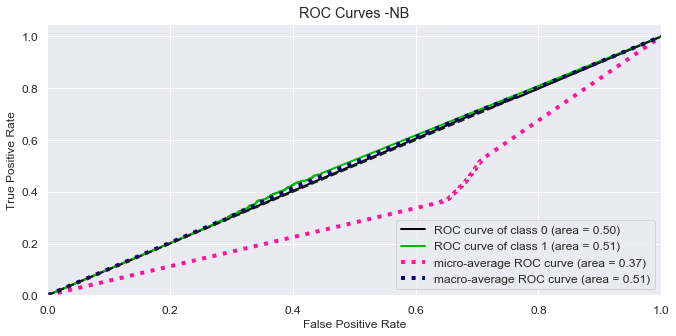

In [115]:
skplt.metrics.plot_roc(Y_test, nb_model.predict_proba(X_test), 
                       title='ROC Curves -NB') 


### Naive Bayes Multinomial

In [101]:
dat = pd.merge(prep.drop(columns=['Review','Polarity']),msg_tfidf, 
                  left_index=True, right_index=True )
dat.head()

,Recommended,Review_length,Exc_Count,0,1,2,3,4,5,6,...,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275
2,0,524,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,141,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,209,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,512,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,517,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
X1 = dat.drop('Recommended', axis=1)
Y1 = dat.Recommended

X1.head()

,Review_length,Exc_Count,0,1,2,3,4,5,6,7,...,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275
2,524,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,141,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,209,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,512,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,517,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
X_train1, X_test1, Y_train1, Y_test1 = split(X1,Y1, test_size=0.3, stratify=Y1, random_state=111)
X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape

((11523, 7278), (4939, 7278), (11523,), (4939,))

In [104]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train1, Y_train1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [107]:
pred=nb.predict(X_test1)

In [108]:

print(confusion_matrix(Y_test1, pred))
print(classification_report(Y_test1, pred))

[[   0  896]
 [   6 4037]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       896
           1       0.82      1.00      0.90      4043

    accuracy                           0.82      4939
   macro avg       0.41      0.50      0.45      4939
weighted avg       0.67      0.82      0.74      4939

